### Feature Classifier 2022-03
The point of this file is to see how well a model can classify road segments given limited, proximal information from the cities centreline data.
Some of this data is already used for the classification of LTS; however, this model tries to use limited, easy to access datasets that may be transferrable across all cities in order to speed up the classification process without using all of the features used in the 2016 paper.

In [94]:
#Import all packages from model functions
from model_functions import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('dark_background')

Import train centreline data

In [118]:
train_data = pd.read_csv('C:/Users/Keagan Rankin/Documents/PycharmProj/data/training_data/centreline_train.csv')
print(train_data.shape)
train_data.head()

(47642, 20)


,Unnamed: 0,OBJECTID,GEO_ID,LFN_ID,LF_NAME,FNODE,TNODE,ONE_WAY_DI,length_in_,GEO_ID_1,LTS,Shape_Leng,geometry_x,CENTRELINE_ID,FEATURE_CODE,FEATURE_CODE_DESC,JURISDICTION,LINEAR_NAME_FULL,geometry_y,high access
0,5802,5803,30042604,19160,Humber Bay Park East Trl,30042602,30042575,0,262.594602,30042604,1,0.002982,LINESTRING (623332.957367055 4831097.427160588...,30042604.0,204001.0,Trail,CITY OF TORONTO,Humber Bay Park East Trl,LINESTRING (623332.9577967289 4831097.42754057...,1
1,29701,29702,1145192,4226,Princess St,13466511,13466439,0,52.862624,1145192,1,0.000493,LINESTRING (631701.0632031693 4834417.34945941...,1145192.0,201500.0,Local,CITY OF TORONTO,Princess St,LINESTRING (631701.0633485425 4834417.34967383...,1
2,12276,12277,20040812,18365,Ln S Lawrence W Caledonia,20040786,20040767,0,206.885339,20040812,1,0.002516,LINESTRING (623347.8718389388 4840852.21916073...,20040812.0,201700.0,Laneway,CITY OF TORONTO,Ln S Lawrence W Caledonia,LINESTRING (623347.8720445114 4840852.21937292...,1
3,45306,45307,110034,7636,Compton Dr,13450180,13449908,0,216.496835,110034,2,0.002032,LINESTRING (637451.6372979514 4845481.77576266...,110034.0,201500.0,Local,CITY OF TORONTO,Compton Dr,LINESTRING (637451.6370525364 4845481.77562792...,1
4,35544,35545,1139880,3556,Golfview Ave,13461223,13461112,0,69.313966,1139880,1,0.000650,LINESTRING (636325.5517822029 4837927.26168129...,1139880.0,201500.0,Local,CITY OF TORONTO,Golfview Ave,LINESTRING (636325.5516523538 4837927.26232100...,1


#### Clean and feature engineer using model_functions.py

After evaluating the features in the model, many of them are similar. Ex. Arterial vs. Arterial Ramp. <br>
Before doing any other feature eng, create a function that combines these similar features. Convert to the majoy road types: <br>
Local, Collector, Arterial, Highway. Keep paths seperate. Do we lose info when we do this?

In [119]:
train_data['FEATURE_CODE_DESC'].unique()
def map_centreline_features(data):
    """
    Maps the centreline feature codes to their more like features.
    """
    data_m = data.copy()
    data_m['FEATURE_CODE_DESC'] = data_m['FEATURE_CODE_DESC'].replace({'Laneway':'Local',
                                                                       'Minor Arterial':'Arterial',
                                                                       'Major Arterial':'Arterial',
                                                                       'Major Arterial Ramp':'Arterial',
                                                                       'Walkway':'Trail',
                                                                       'Collector Ramp':'Collector',
                                                                       'Minor Arterial Ramp':'Arterial',
                                                                        })
    
    
    return data_m

train_data = map_centreline_features(train_data)
train_data['FEATURE_CODE_DESC']

0           Trail
1           Local
2           Local
3           Local
4           Local
           ...   
47637       Local
47638       Local
47639       Trail
47640    Arterial
47641       Local
Name: FEATURE_CODE_DESC, Length: 47642, dtype: object

In [121]:
# Split features/target
y_train_lts = train_data['LTS']
y_train_access = train_data['high access']
X_train = train_data.drop(['LTS','high access'], axis=1)

# Rename a row to work in a function
X_train = X_train.rename({'geometry_y':'geometry'}, axis=1)

In [122]:
# Engineer features usign model functions.
keep_rows = ['FEATURE_CODE_DESC','geometry']
X_train = droprows(X_train, keep_rows)
X_train = add_regions(X_train, 2, 3)
X_train = dummy(X_train, dummy_feats=['FEATURE_CODE_DESC'])
X_train.head()

TypeError: Only str is accepted.

In [105]:
X_train.shape

(47642, 10)

#### Look at features, models
CV, select kbest, spatialCV

In [106]:
model_log = LogisticRegression()
model_svm = svm.SVC()
model_rf = RandomForestClassifier()

In [107]:
feature_selector(model_log, splits=10, X=X_train.iloc[:,1:], y=y_train_access, i=4)

Selected features: ['FEATURE_CODE_DESC_Arterial', 'FEATURE_CODE_DESC_Collector', 'FEATURE_CODE_DESC_Local', 'FEATURE_CODE_DESC_Trail']
Selected features: ['FEATURE_CODE_DESC_Arterial', 'FEATURE_CODE_DESC_Collector', 'FEATURE_CODE_DESC_Local', 'FEATURE_CODE_DESC_Trail']
Selected features: ['FEATURE_CODE_DESC_Arterial', 'FEATURE_CODE_DESC_Collector', 'FEATURE_CODE_DESC_Local', 'FEATURE_CODE_DESC_Trail']
Selected features: ['FEATURE_CODE_DESC_Arterial', 'FEATURE_CODE_DESC_Collector', 'FEATURE_CODE_DESC_Local', 'FEATURE_CODE_DESC_Trail']
Selected features: ['FEATURE_CODE_DESC_Arterial', 'FEATURE_CODE_DESC_Collector', 'FEATURE_CODE_DESC_Local', 'FEATURE_CODE_DESC_Trail']
Selected features: ['FEATURE_CODE_DESC_Arterial', 'FEATURE_CODE_DESC_Collector', 'FEATURE_CODE_DESC_Local', 'FEATURE_CODE_DESC_Trail']
Selected features: ['FEATURE_CODE_DESC_Arterial', 'FEATURE_CODE_DESC_Collector', 'FEATURE_CODE_DESC_Local', 'FEATURE_CODE_DESC_Trail']
Selected features: ['FEATURE_CODE_DESC_Arterial', 'FEAT

In [108]:
#features = ['FEATURE_CODE_DESC_Collector', 'FEATURE_CODE_DESC_Collector Ramp', 
#             'FEATURE_CODE_DESC_Laneway', 'FEATURE_CODE_DESC_Local', 
#             'FEATURE_CODE_DESC_Major Arterial', 'FEATURE_CODE_DESC_Major Arterial Ramp', 
#             'FEATURE_CODE_DESC_Minor Arterial', 'FEATURE_CODE_DESC_Other', 
#             'FEATURE_CODE_DESC_Trail', 'FEATURE_CODE_DESC_Walkway']

features = ['FEATURE_CODE_DESC_Arterial', 'FEATURE_CODE_DESC_Collector', 
            'FEATURE_CODE_DESC_Local', 'FEATURE_CODE_DESC_Trail']

#### Tune hyperparameters
use random search

In [109]:
cv = StratifiedKFold(n_splits=10)

# Choose hyper-params
params_log = {'penalty': ('l1', 'l2'),
              'fit_intercept': (True, False),
              'C': loguniform(1e-3, 1e2),
              'class_weight': (None, 'balanced')
             }

# Do the search (might take awhile)
r_search_log = RandomizedSearchCV(estimator=model_log,
                                  param_distributions=params_log,
                                  n_iter=200,
                                  scoring='f1_weighted',
                                  cv=cv,
                                 )

r_search_log.fit(X_train[features], y_train_access)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=LogisticRegression(), n_iter=200,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000264A61B3550>,
                                        'class_weight': (None, 'balanced'),
                                        'fit_intercept': (True, False),
                                        'penalty': ('l1', 'l2')},
                   scoring='f1_weighted')

In [110]:
print('best weighted score', r_search_log.best_score_)
print('best estimator: ',r_search_log.best_estimator_)

best weighted score 0.8985254425614924
best estimator:  LogisticRegression(C=0.2608260778515442, class_weight='balanced')


<br>Train the model:

In [111]:
model_features = LogisticRegression(C=0.2608260778515442, class_weight='balanced')
model_features.fit(X_train[features], y_train_access)

y_pred = model_features.predict(X_train[features])

#### Model Evaluation
Metrics, visualizations included

In [112]:
print('accuracy: ', accuracy_score(y_train_access, y_pred))
print('weighted f1: ', f1_score(y_train_access, y_pred, average='weighted'))

accuracy:  0.8926997187355694
weighted f1:  0.8985230816370674


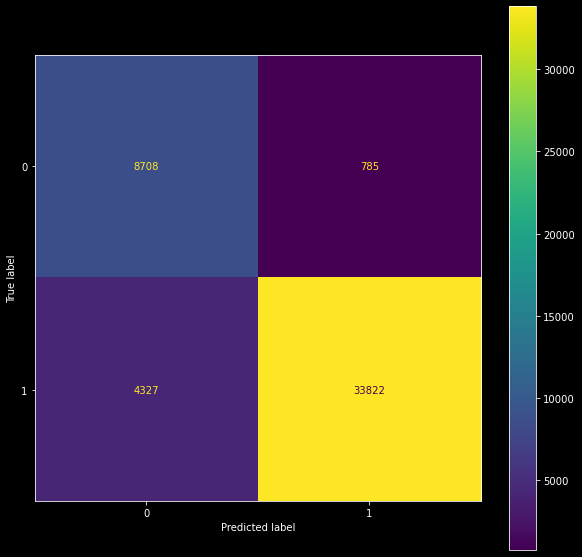

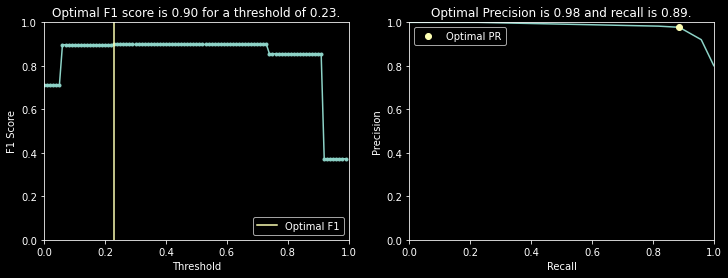

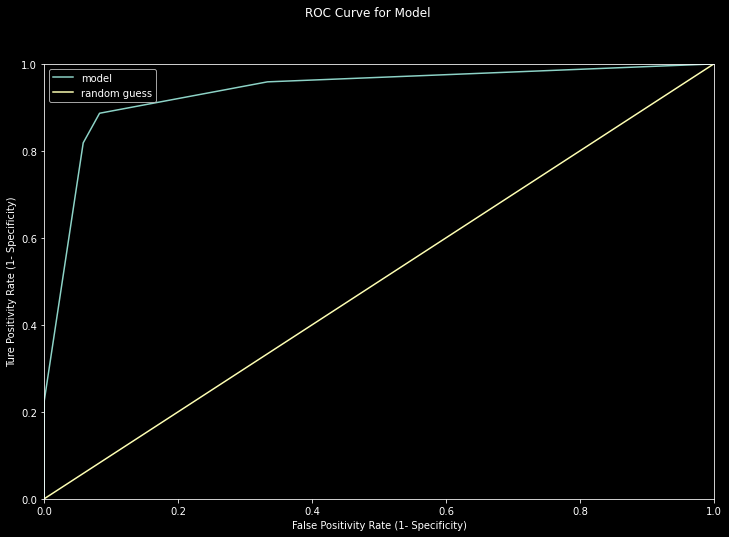

In [113]:
# Confusion matrix
f, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model_features, X_train[features], y_train_access, ax=ax)
ax.grid(False)

#Weighted F1 score with optimal threshold if relevant
plot_f1_threshold(X_train[features], y_train_access, model_features)

#roc curve
plot_roc(y_train_access, model_features.predict_proba(X_train[features]))

Plot the classifications geospatially

In [114]:
predicted = pd.Series(y_pred)
predicted = pd.concat((train_data, predicted), axis=1)

In [115]:
lts_gpd = gpd.read_file('C:/Users/Keagan Rankin/Documents/PycharmProj/data/raw_data/Bo Github Data/centerline_LTS_July2021.shp')
lts_gpd = lts_gpd[lts_gpd['LTS'] != 0]
lts_gpd['high access'] = lts_gpd['LTS'].apply(lambda x: 1 if x <= 2 else 0)

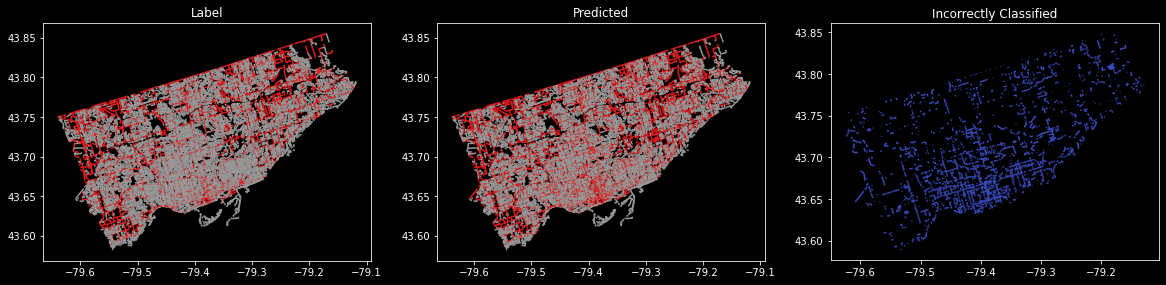

In [117]:
# Plot the above to show the new data. Show with 4 LTS and with the high/low access grouping
# Geoframe
plotr = pd.merge(lts_gpd,
                 predicted[['GEO_ID',0]],
                 how='left',
                 left_on='GEO_ID',
                 right_on='GEO_ID',)

# Find the difference in classification
plotr = plotr.dropna()
plotr['diff'] = plotr['high access'] - plotr[0]
plotr['diff'] = plotr['diff'].apply(lambda x: 'incorrect' if x != 0 else 'correct')

# Figure
fig, axs = plt.subplots(figsize=(20,12), ncols=3)

# Plotting
plotr.plot(ax=axs[0], column='high access', cmap='Set1')
plotr.plot(ax=axs[1], column=0, cmap='Set1')
plotr[plotr['diff'] == 'incorrect'].plot(ax=axs[2], column='diff', cmap='coolwarm')

# Attributes
axs[0].title.set_text('Label')
axs[1].title.set_text('Predicted')
axs[2].title.set_text('Incorrectly Classified')
axs[0].grid(False)
axs[1].grid(False)
axs[2].grid(False)

plt.show()